In [1]:
import pandas as pd
import networkx as nx

import requests
from bs4 import BeautifulSoup


都道府県よりも空港が良いかもね

In [2]:
res = requests.get("https://uub.jp/prf/rinsetsu.html")
soup = BeautifulSoup(res.content, "html.parser")

adjacencies = []
for tr_dom in soup.select('tr.bw.ar'):
    prefecture = tr_dom.select('td.al')[0].text
    for dom in tr_dom.select('td.al nobr'):
        _prefecture = dom.text
        adjacencies.append((prefecture, _prefecture))

In [3]:
url = "https://gist.githubusercontent.com/ctsaran/42728dad3c7d8bd91f1d/raw/017718dde64f70e221f0e2bb0487a6c975d6195d/gistfile1.txt"
df = pd.read_table(url, sep='\t', header=None)
df.columns = ['pid', 'prefecture', 'lat', 'lng']

pos = {}
for _, row in df.iterrows():
    pos[row['prefecture']] = (row['lng'], row['lat'])

In [11]:
prefectures = list(pos.keys())

G = nx.Graph()
G.add_nodes_from(prefectures)
G.add_edges_from(adjacencies)

G.remove_node('沖縄県')
nx.write_adjlist(G, '../data/prefecture/prefecture.adjlist')


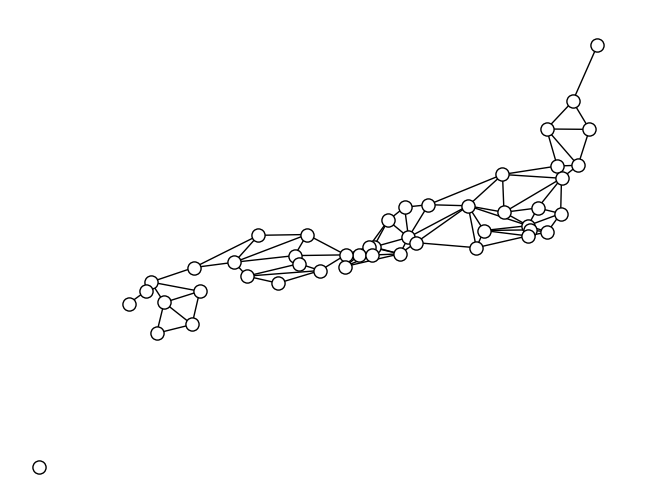

In [5]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': False,
    'node_size': 90,
    'font_size': 10,
    'font_family': 'IPAPGothic',
}

nx.draw(G, pos, **DRAW_CONFIG) 

In [238]:
nx.eigenvector_centrality(G)

{'北海道': 0.003152143090206977,
 '青森県': 0.015863375643521877,
 '岩手県': 0.028758179899966287,
 '宮城県': 0.08094060506475222,
 '秋田県': 0.04792301747696245,
 '山形県': 0.11561250606268846,
 '福島県': 0.21504294348529857,
 '茨城県': 0.1795223303546844,
 '栃木県': 0.19682721085148053,
 '群馬県': 0.2713902132614633,
 '埼玉県': 0.32458286600401226,
 '千葉県': 0.16699855609312922,
 '東京都': 0.17848874124641925,
 '神奈川県': 0.157830899958416,
 '新潟県': 0.23791651175757544,
 '富山県': 0.20386481763340447,
 '石川県': 0.12166788723886986,
 '福井県': 0.133467143799619,
 '山梨県': 0.24883635505747234,
 '長野県': 0.3914059779994683,
 '岐阜県': 0.2749539164983712,
 '静岡県': 0.19996306245878814,
 '愛知県': 0.20823985883238738,
 '三重県': 0.18163556771945585,
 '滋賀県': 0.14340825364413087,
 '京都府': 0.13163015491389124,
 '大阪府': 0.0667294991900175,
 '兵庫県': 0.04834381117830379,
 '奈良県': 0.08882536273497427,
 '和歌山県': 0.06700460680450095,
 '鳥取県': 0.015771590167231994,
 '島根県': 0.005620164113378539,
 '岡山県': 0.016019885609528203,
 '広島県': 0.009381641971136528,
 '山口県': 0.0031

In [239]:
nx.pagerank(G)

{'北海道': 0.009463772055107192,
 '青森県': 0.02192824553751569,
 '岩手県': 0.019370080463195088,
 '宮城県': 0.022406049926114634,
 '秋田県': 0.02420902064557858,
 '山形県': 0.02115279824461049,
 '福島県': 0.028428093640429933,
 '茨城県': 0.01913783003273902,
 '栃木県': 0.018952828071331758,
 '群馬県': 0.022695695169842607,
 '埼玉県': 0.030886715579608984,
 '千葉県': 0.01921248699736625,
 '東京都': 0.01905891746826094,
 '神奈川県': 0.019273204743117247,
 '新潟県': 0.023346707687455982,
 '富山県': 0.019033046323774845,
 '石川県': 0.01526067711402002,
 '福井県': 0.019517561852167704,
 '山梨県': 0.022827432935628535,
 '長野県': 0.03455641717550337,
 '岐阜県': 0.031450571992781874,
 '静岡県': 0.018872446772478128,
 '愛知県': 0.018706540369318587,
 '三重県': 0.027925198430243034,
 '滋賀県': 0.01921422516472368,
 '京都府': 0.02853341146738925,
 '大阪府': 0.02051648011341458,
 '兵庫県': 0.026281581467248273,
 '奈良県': 0.020094291006646343,
 '和歌山県': 0.015835543064967327,
 '鳥取県': 0.022635869241172436,
 '島根県': 0.018488765447984085,
 '岡山県': 0.022560924492864076,
 '広島県': 0.028734935